Notebook 1: Linear regression
---------------------------------------------

We generate data from a "mistery line" and we add some noise. Given the data, our goal is to obtain the best approximation to the original "mistery line".

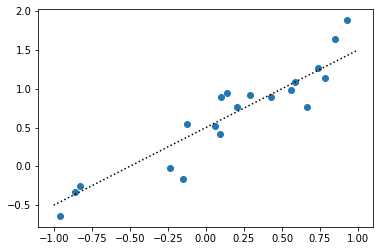

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

LOW_X = -1
HIGH_X = 1

def mistery_function(x): #Don't look!
    return 0.5 + x

def generate_data(num_data=20, noise=0.2, seed=0):
    rst = np.random.RandomState(seed)
    x_data = rst.uniform(LOW_X, HIGH_X, num_data)
    y_data = mistery_function(x_data) + noise*rst.randn(num_data)
    return x_data, y_data

x, y = generate_data()
x_plot = np.linspace(LOW_X, HIGH_X, 100)
y_plot = mistery_function(x_plot)

fig, ax = plt.subplots(1)
ax.scatter(x, y)
ax.plot(x_plot, y_plot, ':k')

This optimisation has a single optimum, and there is a closed formula to calculate it (we will show that on the whiteboard)

Here, we do it numerically, by following the gradient in the direction of making the cost function smaller.

In [3]:
def gradient_descent(x, y, m=0, b=0, learning_rate=1e-2):
    y_pred = (m * x) + b
    delta_y = y - y_pred
    cost = np.mean(delta_y**2)
    m_grad = -2 * np.mean(x * delta_y)
    b_grad = -2 * np.mean(delta_y)
    new_m = m - (learning_rate * m_grad)
    new_b = b - (learning_rate * b_grad) 
    return new_m, new_b, cost

In [4]:
%%capture 
#Run this cell, but do not worry too much, it is just a plotting function
fig, ax = plt.subplots(1)
ax.scatter(x, y)
ax.plot(x_plot, y_plot, ':k')
lines, = ax.plot([], [], '--r')

In [5]:
m_array = []
b_array = []
cost_array = []
m, b = 0, 0
num_steps = 200
learning_rate = 1e-2
for i in range(num_steps):
    # Performing gradient descent and updating b, m
    m, b, cost = gradient_descent(x, y, m, b, learning_rate=learning_rate)
    # Storing b, m and cost
    m_array.append(m)
    b_array.append(b)
    cost_array.append(cost)

def animate(i):
    lines.set_data(x_plot, x_plot*m_array[i] + b_array[i])
    
anim = animation.FuncAnimation(fig, animate, frames=num_steps)
HTML(anim.to_html5_video())

This is too slow! You can play with the learning rate to decrease convergence time... but careful with oscillations!

Text(0, 0.5, 'Cost')

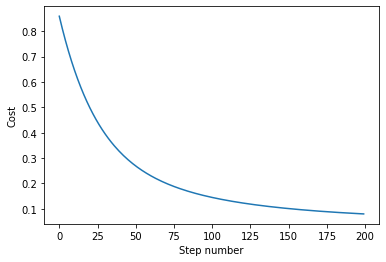

In [6]:
fig_cost, ax_cost = plt.subplots(1)
ax_cost.plot(cost_array)
ax_cost.set_xlabel("Step number")
ax_cost.set_ylabel("Cost")


Calculating the gradient might get too computationally expensive if data is plenty. To prevent that, we can use one datapoint at each step of gradient descent

In [7]:
def stochastic_gradient_descent(x, y, m=0, b=0, learning_rate = 1e-2, rst=None):   
    index = rst.randint(len(x))
    y_pred = (m * x) + b
    delta_y = y - y_pred
    cost = np.mean(delta_y**2)
    m_grad = -2 * (x * delta_y)[index]
    b_grad = -2 * (delta_y)[index]
    new_m = m - (learning_rate * m_grad)
    new_b = b - (learning_rate * b_grad) 
    return new_m, new_b, cost


In [8]:
%%capture 
#Run this cell, but do not worry too much, it is just a plotting function
fig_SGD, ax_SGD = plt.subplots(1)
ax_SGD.scatter(x, y)
ax_SGD.plot(x_plot, y_plot, ':k')
lines, = ax_SGD.plot([], [], '--r')

In [9]:
rst = np.random.RandomState(0)
m_array = []
b_array = []
cost_array = []
m, b = 0, 0
num_steps = 200
for i in range(num_steps):
    m, b, cost = stochastic_gradient_descent(x, y, m=m, b=b, rst=rst)
    m_array.append(m)
    b_array.append(b)
    cost_array.append(cost)

def animate(i):
    lines.set_data(x_plot, x_plot*m_array[i] + b_array[i])
    
anim = animation.FuncAnimation(fig_SGD, animate, frames=num_steps)
HTML(anim.to_html5_video())

Text(0, 0.5, 'Cost')

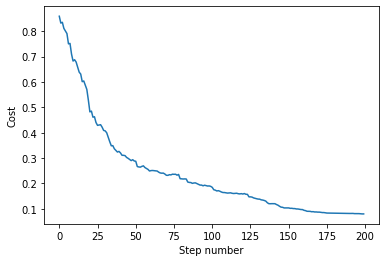

In [10]:
fig_costSGD, ax_costSGD = plt.subplots(1)
ax_costSGD.plot(cost_array)
ax_costSGD.set_xlabel("Step number")
ax_costSGD.set_ylabel("Cost")